<a href="https://colab.research.google.com/github/rushikeshnaik779/PracticeForNLP/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pymagnitude pytorch_pretrained_bert tensorboardcolab -q

     |████████████████████████████████| 5.4MB 5.3MB/s 
     |████████████████████████████████| 133kB 38.7MB/s 
     |████████████████████████████████| 133kB 33.9MB/s 
     |████████████████████████████████| 7.3MB 34.3MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
ERROR: botocore 1.20.34 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import torch.nn as nn
from pymagnitude import Magnitude 
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from scipy import spatial 
from sklearn.manifold import TSNE 
from tensorboardcolab import TensorBoardColab 
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm_notebook as tqdm

In [3]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

RED, BLUE = '#FF4136', '#0074D9'

In [5]:
sentence = ' the quick brown fox jumps over the lazy dog'

words = sentence.split()
words

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [6]:
word2idx = {word: idx for idx, word in enumerate(sorted(set(words)))}
word2idx

{'brown': 0,
 'dog': 1,
 'fox': 2,
 'jumps': 3,
 'lazy': 4,
 'over': 5,
 'quick': 6,
 'the': 7}

In [7]:
idxs = torch.LongTensor([word2idx[word] for word in sentence.split()])
idxs

tensor([7, 6, 0, 2, 3, 5, 7, 4, 1])

In [8]:
embedding_layer = nn.Embedding(num_embeddings=len(word2idx), embedding_dim=3)
embeddings = embedding_layer(idxs)
embeddings, embeddings.shape

(tensor([[ 0.7241,  1.0410, -0.9327],
         [ 0.0498,  1.1423,  2.4231],
         [-1.8443,  0.9118,  1.3230],
         [ 0.9656, -1.2072, -1.1414],
         [-2.1206, -1.1748,  0.0709],
         [-1.4047, -1.3654,  2.4456],
         [ 0.7241,  1.0410, -0.9327],
         [-0.4759, -1.7738,  1.0039],
         [ 0.2819,  1.1859,  0.9239]], grad_fn=<EmbeddingBackward>),
 torch.Size([9, 3]))

In [9]:
# GLOVE Embeddings 

!wget http://magnitude.plasticity.ai/glove/light/glove.6B.50d.magnitude glove/

--2021-03-23 07:40:55--  http://magnitude.plasticity.ai/glove/light/glove.6B.50d.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.216.112.66
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.216.112.66|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102670336 (98M) [binary/octet-stream]
Saving to: ‘glove.6B.50d.magnitude’

glove.6B.50d.magnit 100%[===================>]  97.91M  15.0MB/s    in 22s     

2021-03-23 07:41:20 (4.49 MB/s) - ‘glove.6B.50d.magnitude’ saved [102670336/102670336]

--2021-03-23 07:41:20--  http://glove/
Resolving glove (glove)... failed: Name or service not known.
wget: unable to resolve host address ‘glove’
FINISHED --2021-03-23 07:41:20--
Total wall clock time: 25s
Downloaded: 1 files, 98M in 22s (4.49 MB/s)


In [10]:
# load magnitude glove vectors

glove_vectors = Magnitude('glove/glove.6B.50d.magnitude')
glove_embeddings = glove_vectors.query(words)

In [11]:
# Similarity operation on embeddings 
def cosine_similarity(word1, word2):
    vector1, vector2 = glove_vectors.query(word1), glove_vectors.query(word2)
    return 1 - spatial.distance.cosine(vector1, vector2)

In [12]:
word_pairs = [
              ('dog', 'cat'),
              ('tree', 'cat'),
              ('tree', 'leaf'),
              ('king', 'queen')
]


for word1, word2 in word_pairs: 
    print(f'similarity between "{word1}" and "{word2}" :\t{cosine_similarity(word1, word2):.2f}')

similarity between "dog" and "cat" :	0.92
similarity between "tree" and "cat" :	0.57
similarity between "tree" and "leaf" :	0.74
similarity between "king" and "queen" :	0.78


In [13]:
ANIMALS = [
    'whale',
    'fish',
    'horse',
    'rabbit',
    'sheep',
    'lion',
    'dog',
    'cat',
    'tiger',
    'hamster',
    'pig',
    'goat',
    'lizard',
    'elephant',
    'giraffe',
    'hippo',
    'zebra',
]

HOUSEHOLD_OBJECTS = [
    'stapler',
    'screw',
    'nail',
    'tv',
    'dresser',
    'keyboard',
    'hairdryer',
    'couch',
    'sofa',
    'lamp',
    'chair',
    'desk',
    'pen',
    'pencil',
    'table',
    'sock',
    'floor',
    'wall',
]

In [14]:
tsne_words_embedded = TSNE(n_components=2).fit_transform(glove_vectors.query(ANIMALS + HOUSEHOLD_OBJECTS))
tsne_words_embedded.shape

(35, 2)

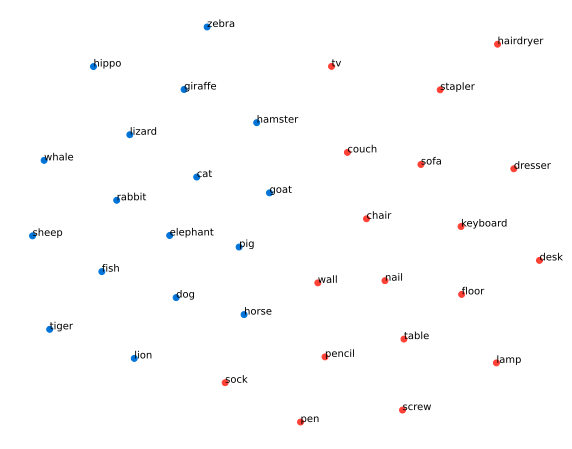

In [15]:
x, y = zip(*tsne_words_embedded)

fig, ax = plt.subplots(figsize=(10, 8))

for i, label in enumerate(ANIMALS + HOUSEHOLD_OBJECTS):
    if label in ANIMALS:
        color = BLUE
    elif label in HOUSEHOLD_OBJECTS:
        color = RED
        
    ax.scatter(x[i], y[i], c=color)
    ax.annotate(label, (x[i], y[i]))

ax.axis('off')

plt.show()

In [17]:
tbc=TensorBoardColab()

vectors = glove_vectors.query(ANIMALS + HOUSEHOLD_OBJECTS)
with SummaryWriter(log_dir="./") as writer:
    writer.add_embedding(mat=vectors, metadata=ANIMALS+HOUSEHOLD_OBJECTS)

Wait for 8 seconds...
TensorBoard link:
http://fb050a82f459.ngrok.io


AttributeError: ignored

In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

def to_bert_embeddings(text, return_tokens=False):
    if isinstance(text, list):
        # Already tokenized
        tokens = tokenizer.tokenize(' '.join(text))
    else:
        # Need to tokenize
        tokens = tokenizer.tokenize(text)
        
    tokens_with_tags = ['[CLS]'] + tokens + ['[SEP]']
    indices = tokenizer.convert_tokens_to_ids(tokens_with_tags)

    out = model(torch.LongTensor(indices).unsqueeze(0))
    
    # Concatenate the last four layers and use that as the embedding
    # source: https://jalammar.github.io/illustrated-bert/
    embeddings_matrix = torch.stack(out[0]).squeeze(1)[-4:]  # use last 4 layers
    embeddings = []
    for j in range(embeddings_matrix.shape[1]):
        embeddings.append(embeddings_matrix[:, j, :].flatten().detach().numpy())
        
    # Ignore [CLS] and [SEP]
    embeddings = embeddings[1:-1]
        
    if return_tokens:
        assert len(embeddings) == len(tokens)
        return embeddings, tokens
    
    return embeddings

100%|██████████| 407873900/407873900 [00:34<00:00, 11973924.95B/s]


In [19]:
words_sentences = [
    ('mouse', 'I saw a mouse run off with some cheese.'),
    ('mouse', 'I bought a new computer mouse yesterday.'),
    ('cat', 'My cat jumped on the bed.'),
    ('keyboard', 'My computer keyboard broke when I spilled juice on it.'),
    ('dessert', 'I had a banana fudge sunday for dessert.'),
    ('dinner', 'What did you eat for dinner?'),
    ('lunch', 'Yesterday I had a bacon lettuce tomato sandwich for lunch. It was tasty!'),
    ('computer', 'My computer broke after the motherdrive was overloaded.'),
    ('program', 'I like to program in Java and Python.'),
    ('pasta', 'I like to put tomatoes and cheese in my pasta.'),
]
words = [words_sentence[0] for words_sentence in words_sentences]
sentences = [words_sentence[1] for words_sentence in words_sentences]

In [22]:
! pip install numpy 
embeddings_lst, tokens_lst = zip(*[to_bert_embeddings(sentence, return_tokens=True) for sentence in sentences])
words, tokens_lst, embeddings_lst = zip(*[(word, tokens, embeddings) for word, tokens, embeddings in zip(words, tokens_lst, embeddings_lst) if word in tokens])

# Convert tuples to lists
words, tokens_lst, tokens_lst = map(list, [words, tokens_lst, tokens_lst])

RuntimeError: ignored

In [21]:
target_indices = [tokens.index(word) for word, tokens in zip(words, tokens_lst)]
target_embeddings = [embeddings[idx] for idx, embeddings in zip(target_indices, embeddings_lst)]


NameError: ignored

In [ ]:
tsne_words_embedded = TSNE(n_components=2).fit_transform(target_embeddings)
x, y = zip(*tsne_words_embedded)

fig, ax = plt.subplots(figsize=(5, 10))

for word, tokens, x_i, y_i in zip(words, tokens_lst, x, y):
    ax.scatter(x_i, y_i, c=RED)
    ax.annotate(' '.join([f'$\\bf{x}$' if x == word else x for x in tokens]), (x_i, y_i))

ax.axis('off')
plt.show()